In [ ]:
## https://github.com/student-IH-labs-and-stuff/BER-DAFT-MAR21/blob/main/Labs/iris_lab.md

In [1]:
import pandas as pd                                           # panel data, handling dataframes
pd.set_option('display.max_columns', None)

In [69]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

In [80]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [4]:
columns_list = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"] # column names

data=pd.read_csv('iris_dirty.csv', names = columns_list)    # import csv file
data.head()                                                    # show first 5 rows

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa


In [3]:
data.shape       # dataframe dimensions

(150, 5)

In [6]:
data.info() #1 null in the sepal width column? petal width appears as an object, due to having 'mm' in the column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  151 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  151 non-null    float64
 3   petal_width   151 non-null    object 
 4   class         151 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.0+ KB


In [7]:
data.describe()

,sepal_length,sepal_width,petal_length
count,151.000000,150.000000,151.000000
mean,6.196689,3.057333,3.764901
std,4.324325,0.432776,1.760197
min,4.300000,2.000000,1.000000
25%,5.100000,2.800000,1.600000
50%,5.800000,3.000000,4.400000
75%,6.400000,3.300000,5.100000
max,58.000000,4.400000,6.900000


In [8]:
data.count()

sepal_length    151
sepal_width     150
petal_length    151
petal_width     151
class           151
dtype: int64

In [12]:
data.value_counts() #58. size sepal length? or the period is in the wrong place? Should probably drop

sepal_length  sepal_width  petal_length  petal_width  class          
4.9           3.1          1.5           1 mm         Iris-setosa        3
7.0           3.2          4.7           14 mm        Iris-versicolor    2
6.3           2.9          5.6           18 mm        Iris-virginica     1
6.2           3.4          5.4           23 mm        Iris-virginica     1
6.3           2.3          4.4           13 mm        Iris-versicolor    1
                                                                        ..
5.5           2.3          4.0           13 mm        Iris-versicolor    1
              2.4          3.7           10 mm        Iris-versicolor    1
                           3.8           11 mm        Iris-versicolor    1
              2.5          4.0           13 mm        Iris-versicolor    1
58.0          2.7          5.1           19 mm        Iris-virginica     1
Length: 147, dtype: int64

In [42]:
for col in data:
    print(data[col].unique())      #see all unique values in each column. setsoa seems to be a typo

[5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
[3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6 nan]
[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
[ 2  4  3  1  5  6 14 15 13 16 10 11 18 12 17 25 19 21 22 20 24 23]
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [17]:
data.loc[data['class'] == 'Iris-setsoa'].count() #just one spelling like this. typo?

sepal_length    1
sepal_width     1
petal_length    1
petal_width     1
class           1
dtype: int64

In [19]:
countDat = data['class'].value_counts()
countDat

Iris-versicolor    51
Iris-virginica     50
Iris-setosa        49
Iris-setsoa         1
Name: class, dtype: int64

In [20]:
data['class'] = data['class'].replace({'Iris-setsoa':'Iris-setosa'}) #renaming the typo entry

In [21]:
countDat = data['class'].value_counts()
countDat

Iris-versicolor    51
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

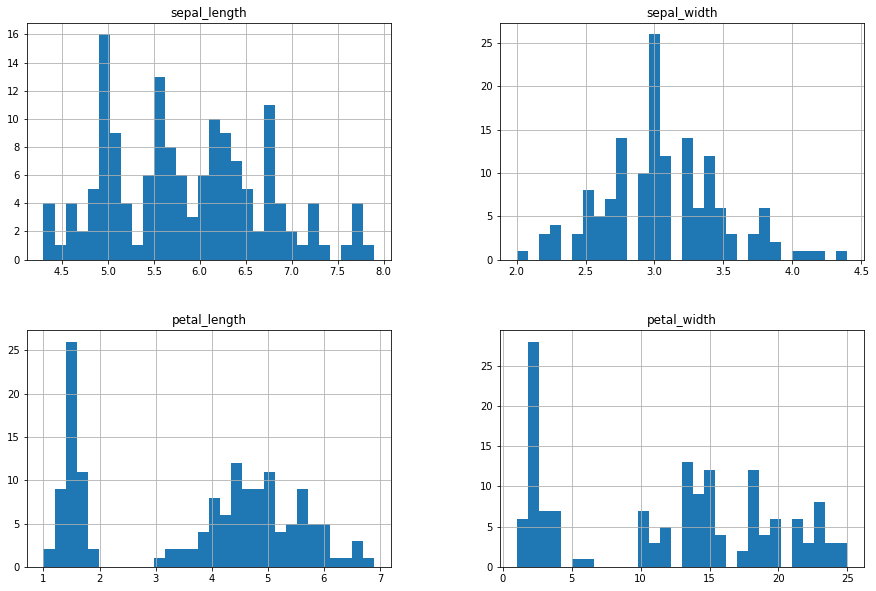

In [40]:
data.hist(bins=30, figsize=(15, 10)) #definite outlier in the sepal_length. Convert

In [25]:
#want to convert petal_length to numerical type and remove the ' mm'

# https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column


data['petal_width'] = data['petal_width'].str.replace(r'\D', '').astype(int)

<ipython-input-25-749680015202>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['petal_width'] = data['petal_width'].str.replace(r'\D', '').astype(int)


In [27]:
data.info() # petal_width is now an integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  151 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  151 non-null    float64
 3   petal_width   151 non-null    int64  
 4   class         151 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 6.0+ KB


In [30]:
def nans(data): return data[data.isnull().any(axis=1)]

In [37]:
nans(data) #there's just one null in sepal_width. Replace with mean AFTER train & test split

,sepal_length,sepal_width,petal_length,petal_width,class
82,5.8,NaN,3.9,12,Iris-versicolor


In [32]:
data.loc[data.duplicated(keep=False)] #should we delete duplicates? or can 2 flowers have the same attributes? going to leave for now

,sepal_length,sepal_width,petal_length,petal_width,class
9,4.9,3.1,1.5,1,Iris-setosa
34,4.9,3.1,1.5,1,Iris-setosa
37,4.9,3.1,1.5,1,Iris-setosa
50,7.0,3.2,4.7,14,Iris-versicolor
100,7.0,3.2,4.7,14,Iris-versicolor


In [33]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,2,Iris-setosa
1,4.9,3.0,1.4,2,Iris-setosa
2,4.7,3.2,1.3,2,Iris-setosa
3,4.6,3.1,1.5,2,Iris-setosa
4,5.0,3.6,1.4,2,Iris-setosa


In [36]:
#x = data.iloc[:, :-1].values

from sklearn.impute import SimpleImputer
missingvalues = SimpleImputer(missing_values = np.nan, strategy = 'mean')
missingvalues = missingvalues.fit(x[:,1:3])
x[:,1:3] = missingvalues.transform(x[:,1:3])

In [41]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,149.000000,150.000000,150.000000
mean,5.851333,3.059732,3.756000,11.953333
std,0.833424,0.433234,1.762681,7.611662
min,4.300000,2.000000,1.000000,1.000000
25%,5.100000,2.800000,1.600000,3.000000
50%,5.800000,3.000000,4.350000,13.000000
75%,6.400000,3.300000,5.100000,18.000000
max,7.900000,4.400000,6.900000,25.000000


In [39]:
data = data[data.sepal_length != 58.] # dropped the 1 row with 58. sepal_length

In [43]:
data.count()

sepal_length    150
sepal_width     149
petal_length    150
petal_width     150
class           150
dtype: int64

In [46]:
numericals = data._get_numeric_data()
numericals

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,2
1,4.9,3.0,1.4,2
2,4.7,3.2,1.3,2
3,4.6,3.1,1.5,2
4,5.0,3.6,1.4,2
...,...,...,...,...
146,6.7,3.0,5.2,23
147,6.3,2.5,5.0,19
148,6.5,3.0,5.2,20
149,6.2,3.4,5.4,23


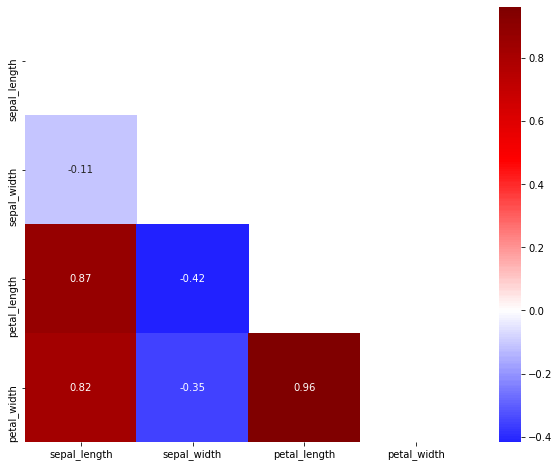

In [47]:
fig, ax = plt.subplots(figsize=(10, 8))

mask=np.zeros_like(numericals.corr())
mask[np.triu_indices_from(mask)]=True

sns.heatmap(numericals.corr(),  # the data for the heatmap
            mask=mask,  # "deactivates" all fields in our heatmap according to the mask
            annot=True,  # show the actual values of correlation
            cmap='seismic',  # provide the 'seismic' colormap
            center=0,  # specify the value at which to center the colormap
           )
plt.show()


In [48]:

# first, split X-y (learning-target data)
X = data.drop(columns=['class'])
y = data['class']

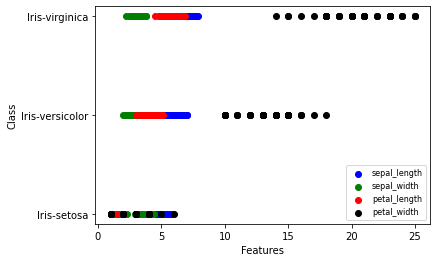

In [78]:
plt.xlabel('Features')
plt.ylabel('Class')

pltX = data.loc[:, 'sepal_length']
pltY = data.loc[:,'class']
plt.scatter(pltX, pltY, color='blue', label='sepal_length')

pltX = data.loc[:, 'sepal_width']
pltY = data.loc[:,'class']
plt.scatter(pltX, pltY, color='green', label='sepal_width')

pltX = data.loc[:, 'petal_length']
pltY = data.loc[:,'class']
plt.scatter(pltX, pltY, color='red', label='petal_length')

pltX = data.loc[:, 'petal_width']
pltY = data.loc[:,'class']
plt.scatter(pltX, pltY, color='black', label='petal_width')

plt.legend(loc=4, prop={'size':8})
plt.show()

In [86]:
from sklearn.datasets import load_iris
from itertools import permutations

In [87]:
perm = list(permutations(data.columns[0:4],2))
colors={'Iris-setosa':'red', 'Iris-versicolor':'blue', 'Iris-virginica':'green'}
plt_col =data['class'].map(colors)

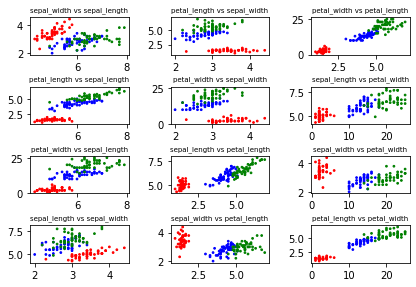

In [89]:
fig, axs = plt.subplots(4, 3)
fig.tight_layout()
for k in range(len(perm)):
    x_var,y_var = perm[k][0],perm[k][1]
    subplt_row = k % 4
    subplt_col = int(k/4)
    axs[subplt_row,subplt_col].scatter(data[x_var],data[y_var],c=plt_col,s=3)
    axs[subplt_row,subplt_col].set_title('v=1',size=7)
    axs[subplt_row,subplt_col].title.set_text(y_var+" vs "+x_var)
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [51]:
from sklearn.linear_model import LogisticRegression

In [62]:
# all parameters not specified are set to their defaults
# https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=400)

In [53]:
#Step 3. Train the model on the data, storing the information learned from the data
# Model is learning the relationship between numerical columnns (x_train) and target column (y_train)

In [72]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
60,5.0,2.0,3.5,10
116,6.4,3.2,5.3,23
145,6.7,3.3,5.7,25
119,7.7,2.6,6.9,23
108,7.3,2.9,6.3,18
...,...,...,...,...
9,4.9,3.1,1.5,1
103,7.1,3.0,5.9,21
67,5.8,2.7,4.1,10
117,6.5,3.0,5.5,18


In [60]:
#still a null value in x_train. will convert it to mean now we've split

nans(x_train)

,sepal_length,sepal_width,petal_length,petal_width


In [59]:
#convert null to mean of column

x_train=x_train.fillna(x_train.mean())

In [63]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=400)

In [65]:
# Returns a NumPy Array
# Predict for 10 observations
logisticRegr.predict(x_test[0:10])

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
      dtype=object)

In [81]:
#Test the model again
#seems to have done well. nice score
predictions = logisticRegr.predict(x_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

print( accuracy_score(y_test, predictions))

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa']

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.95      0.95      0.95        19
 Iris-virginica       0.90      0.90      0.90        10

       accuracy     

In [67]:
predictions = logisticRegr.predict(x_test)
predictions

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [76]:
# Use score method to get accuracy of model
score = logisticRegr.score(y_test, y_predicted)
print(score)

NameError: name 'y_predicted' is not defined

In [70]:
#not so visually appealing

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[16  0  0]
 [ 0 18  1]
 [ 0  1  9]]


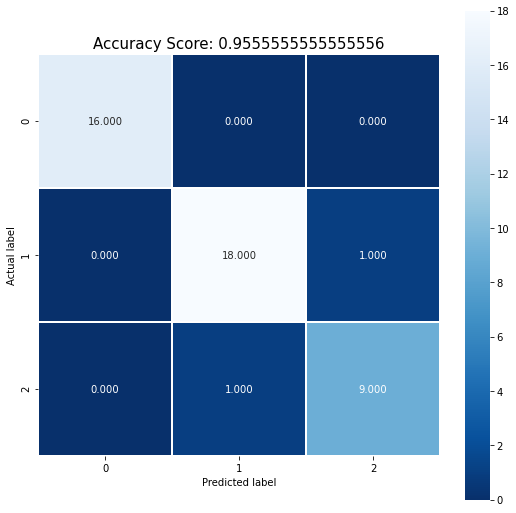

In [71]:
#try and make the confusion matrix prettier

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

TypeError: 'int' object is not iterable

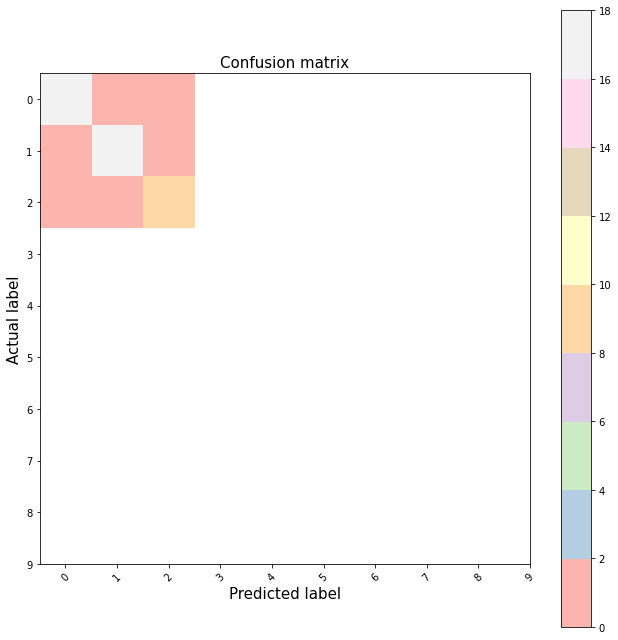

In [77]:
#and with matplotlib

plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in width:
 for y in height:
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')

<ipython-input-92-168556d20c08>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()


([<matplotlib.axis.XTick at 0x7fcbe1119a60>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

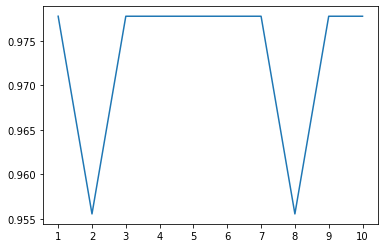

In [92]:
# Let's check the accuracy for various values of n for K-Nearest neighbors

from sklearn.neighbors import KNeighborsClassifier

a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)